In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
sns.set()

In [2]:
url = "https://github.com/renatoquiliche/Insurance-Mathematics-Economics-ADR/blob/main/Databases/insurance.csv?raw=true"

data_insurance = pd.read_csv(url)

In [3]:
#Pre-processing for FAMD

categorical = pd.get_dummies(data_insurance[["sex","smoker", "region"]]) 
numerical = data_insurance[["age","bmi","children", "charges"]]

scaler = RobustScaler()

#Escalamos la data numerica a la escala de la binaria
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=["age","bmi","children", "charges"])

#Unimos los dos tipos de data
final_data_scaled = pd.concat([numerical_data_scaled, categorical], axis=1)

In [4]:
tsne = TSNE(n_components=2,perplexity=20, n_iter=1000, init='pca', learning_rate='auto')
vecs_list_tsne = tsne.fit_transform(final_data_scaled)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [5]:
wcss = []
sil = []
db = []
components = pd.DataFrame(vecs_list_tsne, columns=['tsne1', 'tsne2'])

for i in range(2,20):
    kmeans = AgglomerativeClustering(n_clusters= i, linkage='single')
    kmeans.fit(components)
    #wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(components, kmeans.labels_))
    db.append(davies_bouldin_score(components, kmeans.labels_))

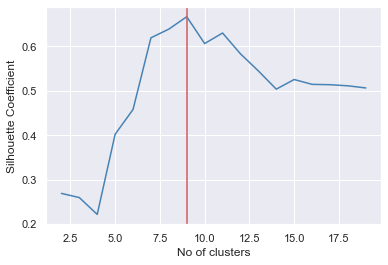

In [6]:
# SC Graph
plt.plot(range(2,20), sil, color="steelblue")
#plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')
plt.axvline(9, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

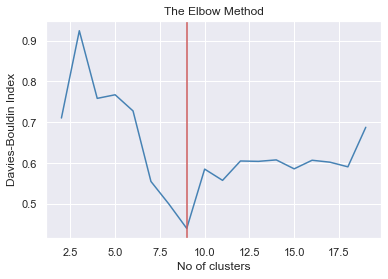

In [7]:
# DB Graph
plt.plot(range(2,20), db, color="steelblue")
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.axvline(9, color="indianred") # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

# Clustering visualization

In [8]:
# Cluster label estimation
from tkinter import font


kmeans4 = AgglomerativeClustering(n_clusters=4, linkage='single')
kmeans4.fit(components)

# Cluster label estimation
kmeans2 = AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans2.fit(components)

# Cluster label estimation
kmeans9 = AgglomerativeClustering(n_clusters=9, linkage='single')
kmeans9.fit(components)

#data_insurance = pd.concat([data_insurance, components, pd.Series(kmeans.labels_, name="Cluster")], axis=1)


data_final = pd.concat([data_insurance, components
                        , pd.Series(kmeans4.labels_, name="Cluster4")
                        , pd.Series(kmeans2.labels_, name="Cluster2")
                        , pd.Series(kmeans9.labels_, name="Cluster9")], axis=1)

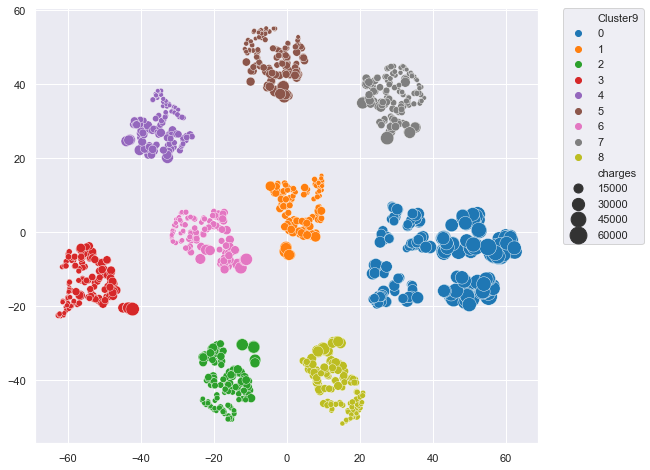

In [9]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1], sizes=(20, 300), 
                hue=data_final['Cluster9'], alpha=1, palette='tab10', size=data_insurance['charges'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
# Defining the Hopkins test function    
def hopkins(X):
    from sklearn.neighbors import NearestNeighbors
    from random import sample
    from numpy.random import uniform
    import numpy as np
    from math import isnan
    import random
    random.seed(0)
    np.random.seed(0)
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

print("Hopkins statistic:", f"{hopkins(components):.2%}", "is significant at 99% for the range (75-100%)")

Hopkins statistic: 94.04% is significant at 99% for the range (75-100%)


## Means t-test to search for clusters based on given categories

In [11]:
Cluster4 = data_final["Cluster4"]
Cluster2 = data_final["Cluster2"]

# K-Means K=4

charges_k4c0 = data_final.charges.values[Cluster4==0]
charges_k4c1 = data_final.charges.values[Cluster4==1]
charges_k4c2 = data_final.charges.values[Cluster4==2]
charges_k4c3 = data_final.charges.values[Cluster4==3]

# K-Means K=2

charges_k2c0 = data_final.charges.values[Cluster2==0]
charges_k2c1 = data_final.charges.values[Cluster2==1]

smoker = data_insurance["smoker"]
age = data_insurance["age"]
sex = data_insurance["sex"]
bmi = data_insurance["bmi"]
children = data_insurance["children"]
region = data_insurance["region"]

#variable smoker
charges_sy = data_insurance.charges.values[smoker=="yes"]
charges_sn = data_insurance.charges.values[smoker=="no"]

#other variables
charges_age1 = data_insurance.charges.values[age>=60]
charges_age2 = data_insurance.charges.values[age<60]

charges_sexm = data_insurance.charges.values[sex=="male"]
charges_sexf = data_insurance.charges.values[sex=="female"]

charges_bmi1 = data_insurance.charges.values[bmi >= 30] #obesity
charges_bmi2 = data_insurance.charges.values[bmi < 30]

charges_children1 = data_insurance.charges.values[children < 1] #No children
charges_children2 = data_insurance.charges.values[children >= 1] #One children or more

charges_rse = data_insurance.charges.values[region == "southeast"]
charges_rsw = data_insurance.charges.values[region == "southwest"]
charges_rne = data_insurance.charges.values[region == "northwest"]
charges_rnw = data_insurance.charges.values[region == "northeast"]

In [12]:
from scipy import stats

#t-test unequal variance between two arrays
def ttest_different_means(a,b):
    res = stats.ttest_ind(a, b, equal_var=False)
    if res[1]<0.05:
        passed="Yes"
    else:
        passed="No"
    return [res[0],passed]

In [13]:
arr = {"Statistic": [], "Passed 95%": []}
j = 0
for i in ["Statistic", "Passed 95%"]:
    arr[i].append(ttest_different_means(charges_sy, charges_sn)[j])
    arr[i].append(ttest_different_means(charges_age1, charges_age2)[j])
    arr[i].append(ttest_different_means(charges_sexm, charges_sexf)[j])
    arr[i].append(ttest_different_means(charges_bmi1, charges_bmi2)[j])
    arr[i].append(ttest_different_means(charges_children1, charges_children2)[j])
    
    arr[i].append(ttest_different_means(charges_rse,charges_rsw)[j])
    arr[i].append(ttest_different_means(charges_rse,charges_rne)[j])
    arr[i].append(ttest_different_means(charges_rse,charges_rnw)[j])

    arr[i].append(ttest_different_means(charges_rsw,charges_rne)[j])
    arr[i].append(ttest_different_means(charges_rsw,charges_rnw)[j])
    
    arr[i].append(ttest_different_means(charges_rne,charges_rnw)[j])
    # Cluster K=2
    arr[i].append(ttest_different_means(charges_k2c1,charges_k2c0)[j])
    
    # Cluster K=4
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c1)[j])
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c2)[j])
    arr[i].append(ttest_different_means(charges_k4c0,charges_k4c3)[j])
    
    arr[i].append(ttest_different_means(charges_k4c1,charges_k4c2)[j])
    arr[i].append(ttest_different_means(charges_k4c1,charges_k4c3)[j])
    
    arr[i].append(ttest_different_means(charges_k4c2,charges_k4c3)[j])
    
    j = 1
    
index= ["Smoker vs Non-smoker", "Old(60+) vs Adults (60-)", "Males vs Females", "Obesity vs Rest",
        "Without vs With Children", "Southeast vs Southweast", "Southeast vs Northeast", "Southeast vs Northweast",
        "Southweast vs Northeast", "Southweast vs Northweast", "Northeast vs Northweast", "Cluster(K=2) 1 vs Cluster(K=2) 0", 
        "Cluster(K=4) 0 vs Cluster(K=4) 1", "Cluster(K=4) 0 vs Cluster(K=4) 2", "Cluster(K=4) 0 vs Cluster(K=4) 3",
        "Cluster(K=4) 1 vs Cluster(K=4) 2", "Cluster(K=4) 1 vs Cluster(K=4) 3",
        "Cluster(K=4) 2 vs Cluster(K=4) 3",]

#import os
#os.chdir(r"D:\IME Q2 - ADR Artigo\Insurance-Mathematics-Economics-ADR-")

pd.DataFrame(arr, index=index).to_excel(r"..\..\Results\Mean t-tests.xlsx")
#data_final.to_excel(r"..\..\Databases\Database.xlsx")
data_final.to_csv(r"..\..\Databases\Database.csv", index=False)



print("t-test for differences in variable Charges, with unequal variance between samples:")
display(pd.DataFrame(arr, index=index))

t-test for differences in variable Charges, with unequal variance between samples:


,Statistic,Passed 95%
Smoker vs Non-smoker,32.751888,Yes
Old(60+) vs Adults (60-),7.166268,Yes
Males vs Females,2.100888,Yes
Obesity vs Rest,7.679159,Yes
Without vs With Children,-2.375272,Yes
Southeast vs Southweast,2.454116,Yes
Southeast vs Northeast,2.425150,Yes
Southeast vs Northweast,1.380165,No
Southweast vs Northeast,-0.079565,No
Southweast vs Northweast,-1.183014,No


## Data analyitics supporting multiple insurance contracts based on categories

In [14]:
from math import inf

data_final["Age"] = pd.cut(data_final.age,bins=[0, 60, inf],labels=["Adult (60-)", "Old adult (60+)"])

data_final["BMI"] = pd.cut(data_final.bmi,bins=[0, 30, inf],labels=["Non-obesity(BMI<30)", "Obesity (BMI>30)"])

data_final["smoker"] = data_final["smoker"].astype("category")

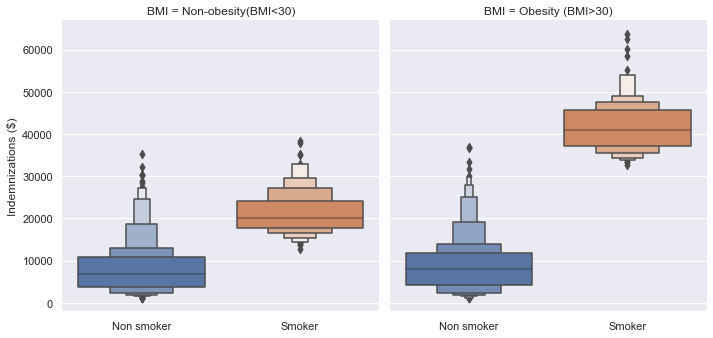

In [15]:
g = sns.catplot(y="charges", x="smoker", col="BMI", data=data_final, kind="boxen")
(g.set_axis_labels("", "Indemnizations ($)")
  .set_xticklabels(["Non smoker", "Smoker"])
  .despine(left=True))

## Feature engineering, export to Julia

In [16]:
import warnings
warnings.filterwarnings("ignore")

input_simulation = data_final[["charges", "Age", "BMI", "smoker"]]

input_simulation["smoker"] = input_simulation["smoker"].str.replace('no','Non - Smoker')
input_simulation["smoker"] = input_simulation["smoker"].str.replace('yes','Smoker')
input_simulation["Four Contracts"] = input_simulation["BMI"].astype(str) + " AND " + input_simulation["smoker"].astype(str) 
input_simulation["Multiple Contracts"] = input_simulation["Age"].astype(str) + " AND " + input_simulation["BMI"].astype(str) + " AND " + input_simulation["smoker"].astype(str) 

input_simulation["Four Contracts"].value_counts()

Obesity (BMI>30) AND Non - Smoker       561
Non-obesity(BMI<30) AND Non - Smoker    503
Obesity (BMI>30) AND Smoker             144
Non-obesity(BMI<30) AND Smoker          130
Name: Four Contracts, dtype: int64

<AxesSubplot:xlabel='charges', ylabel='Four Contracts'>

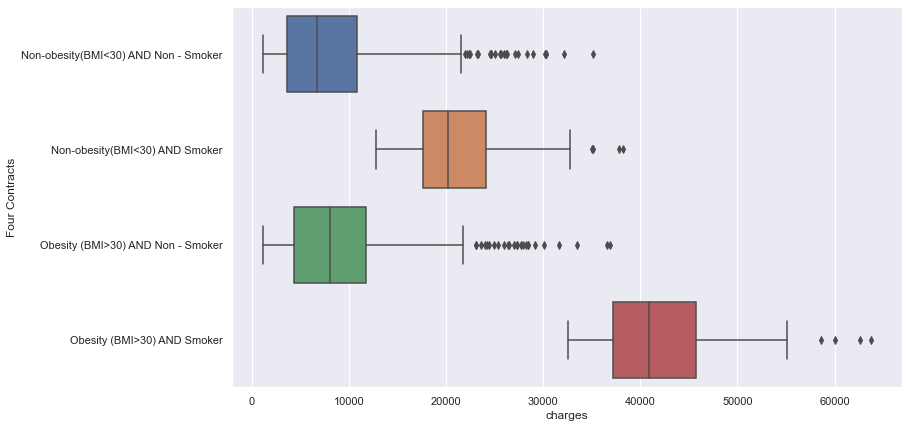

In [17]:
plt.figure(figsize=(12,7))
sns.set()
sns.boxplot(x="charges", y="Four Contracts", data=input_simulation, order=["Non-obesity(BMI<30) AND Non - Smoker", 
                                                                                 "Non-obesity(BMI<30) AND Smoker", 
                                                                                 "Obesity (BMI>30) AND Non - Smoker",
                                                                                 "Obesity (BMI>30) AND Smoker"])

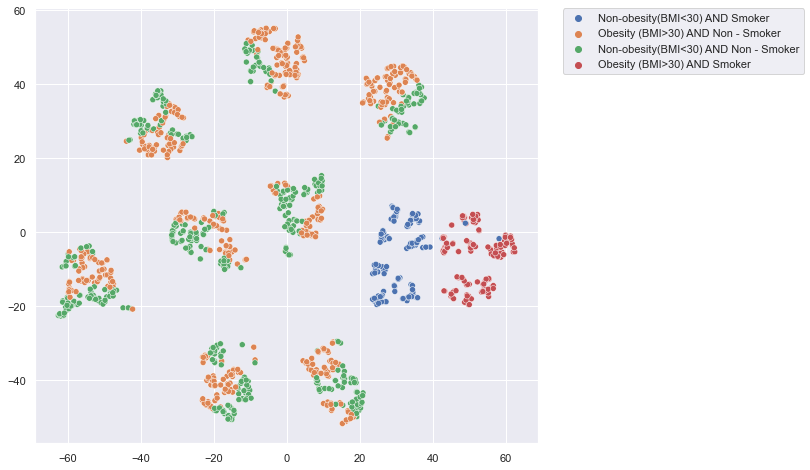

In [18]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1],
                hue=input_simulation['Four Contracts'],alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

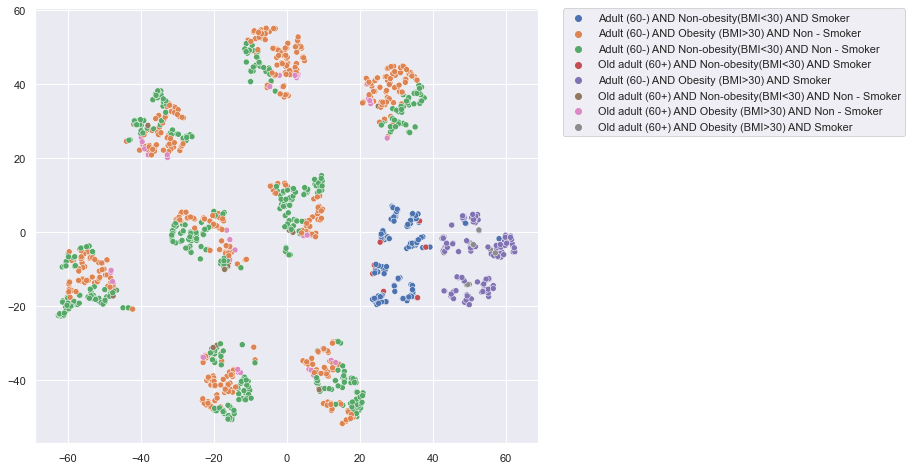

In [19]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1],
                hue=input_simulation['Multiple Contracts'],alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
input_simulation["Cluster_smoker"] = ord_enc.fit_transform(input_simulation[["smoker"]]).astype(int)
input_simulation["Cluster_smoker_bmi"] = ord_enc.fit_transform(input_simulation[["Four Contracts"]]).astype(int)

In [21]:
data_final["Hierarchical2"] = pd.get_dummies((data_final["Cluster9"]>0)).iloc[:,0]

In [22]:
from termcolor import colored

print(colored('Silhouette score Hierarchical (K=2):', 'red', attrs=['bold']), round(silhouette_score(components, data_final["Hierarchical2"]),2))
print(colored('Silhouette score Smoker (K=2):', 'red', attrs=['bold']), round(silhouette_score(components, input_simulation["Cluster_smoker"]),2))

print(colored('Davies-Bouldin score Hierarchical (K=2):', 'green', attrs=['bold']), round(davies_bouldin_score(components, data_final["Hierarchical2"]),2))
print(colored('Davies-Bouldin score Smoker (K=2):', 'green', attrs=['bold']), round(davies_bouldin_score(components, input_simulation["Cluster_smoker"]),2))

print(colored("New Clustering: ", attrs=['bold']))

print(colored('Silhouette score Hierarchical:', 'red', attrs=['bold']), round(silhouette_score(components, data_final["Cluster9"]),2))
print(colored('Silhouette score Four Contracts (K=4):', 'red', attrs=['bold']), round(silhouette_score(components, input_simulation["Cluster_smoker_bmi"]),2))

print(colored('Silhouette score Hierarchical:', 'green', attrs=['bold']), round(davies_bouldin_score(components, data_final["Cluster9"]),2))
print(colored('Silhouette score Four Contracts (K=4):', 'green', attrs=['bold']), round(davies_bouldin_score(components, input_simulation["Cluster_smoker_bmi"]),2))

Silhouette score Hierarchical (K=2): 0.27
Silhouette score Smoker (K=2): 0.27
Davies-Bouldin score Hierarchical (K=2): 0.97
Davies-Bouldin score Smoker (K=2): 0.97
New Clustering: 
Silhouette score Hierarchical: 0.67
Silhouette score Four Contracts (K=4): 0.03
Silhouette score Hierarchical: 0.44
Silhouette score Four Contracts (K=4): 4.14


Text(0.5, 1.0, 'Categorical Clustering (smoker)')

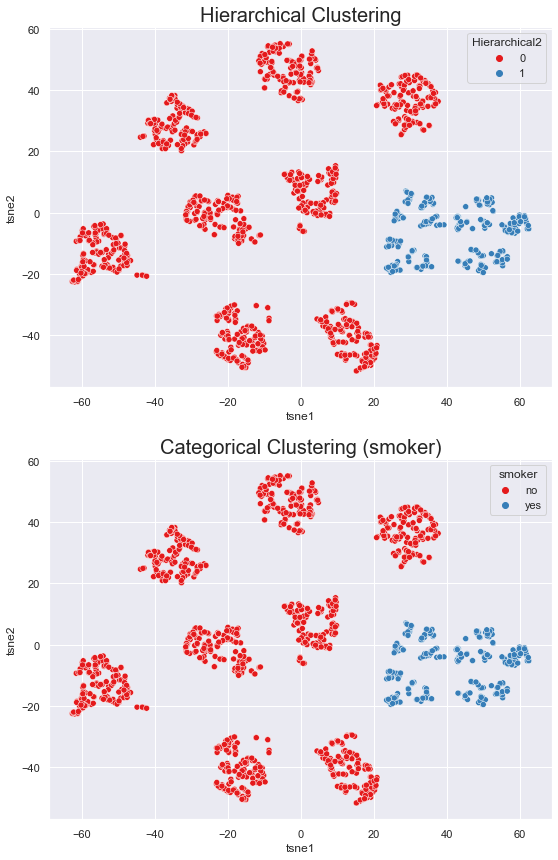

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1)

fig.set_size_inches(9, 8)

plt.subplots_adjust(top=1.5)
sns.scatterplot(ax=ax1, data=data_final, x="tsne1", y="tsne2", hue=data_final["Hierarchical2"], palette="Set1")
ax1.set_title('Hierarchical Clustering', fontsize=20)

sns.scatterplot(ax=ax2, data=data_final, x="tsne1", y="tsne2", hue=data_final["smoker"], palette="Set1")
ax2.set_title('Categorical Clustering (smoker)', fontsize=20)

In [24]:
from sklearn.metrics.cluster import adjusted_rand_score

ARS = adjusted_rand_score(data_final["smoker"], data_final["Hierarchical2"])

print("Adjusted Rand-Score", f"{ARS:.2%}")

from sklearn.metrics import jaccard_score

JS = jaccard_score(pd.get_dummies(data_final["smoker"], drop_first=True), data_final["Hierarchical2"])

print("Jaccard Index", f"{JS:.2%}")

Adjusted Rand-Score 100.00%
Jaccard Index 100.00%


- The variable smoker defines natural clusters in the data (perfect Rand-score and Jaccard Index versus Hierarchical partition)
- The variable obesity generates a good partition into clusters when individuals smoke, proposed partition:
    - **Cluster 0:** Non-smoker
    - **Cluster 1:** Smoker + Non-obesity
    - **Cluster 2:** Smoker + Obesity

- The Non-smoker are the problem, they have non-linear complex patterns that divide them into natural clusters
- Another option: train a decision tree to make K-means clustering interpretable in terms of variables in original feature space